# Visualising TS Data

In this notebook, we'll perform a visual analysis of a single stock. The matplotlib package is one of the most popular in Python for plotting. Let's first get our imports figured out first, since we have a good number of them now!

In [27]:
import pandas as pd
import numpy as np

# 加上带python的plot的功能的package matplotlib
# 网上搜索matplotlib可以找到各种各样的plot样式：https://matplotlib.org/stable/gallery/index.html
import matplotlib.pyplot as plt

Now we can load the dataset, from a file called `GME_WSB.csv`. This data covers a particularly exciting two-year period for GameStop, a chain of video game retail stores.

In [28]:
df = pd.read_csv("data/GME_WSB.csv")
# 数据是那个GameStop和wall street bets
# 有时候出现data是在nb所在另外的folder，需要用这个【../】放在data前面，告诉他去上一层找data folder
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date").sort_index().drop_duplicates()
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-07-01,1.0775,1.1250,1.0775,1.1100,9214800
2020-07-02,1.1225,1.1275,1.0725,1.0725,7550400
2020-07-06,1.0775,1.0850,1.0475,1.0600,8563600
2020-07-07,1.0500,1.0625,1.0150,1.0225,9826400
2020-07-08,1.0250,1.0725,1.0075,1.0650,8211200


Let's create our first simple plot. We'll use the `plot()` function to do this.

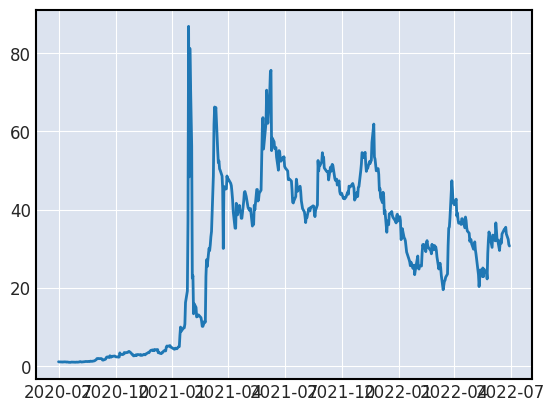

In [29]:
plt.plot(df.Close)

That was easy, but its not very readable, or attractive. Let's try again.

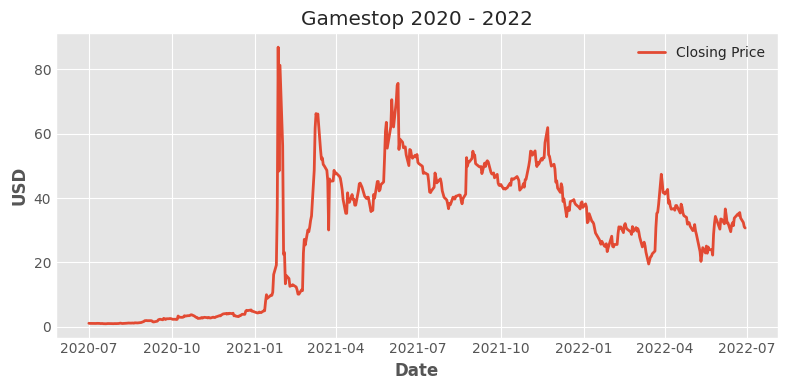

In [30]:
plt.style.use("ggplot")
# use的括号里面可以接各种要用的plotting的格式，ggplot很常用

plt.figure(figsize=(8, 4))
# figure是要做个figure的意思
# figsize是选择plot的size, width and height in inches
plt.title("Gamestop 2020 - 2022")
plt.ylabel("USD")
plt.xlabel("Date")
# labeling

plt.plot(df.Close, label = "Closing Price")
# df.Close是plot什么数据，这个label是line的label
plt.legend()
# 加入legend

plt.tight_layout()
# 这个用于1.不显示任何的答案（如果legend那个code是最后他会显示legend的位置）；2.美化图一点
# 生成出来的图可以点击图片右上角的最后一个按钮，改highlighted的名字然后保存，可下载

One of the most commonly plotted technical indicators is Bollinger Bands. They consist of two lines:

- an upper band 2 standard deviations above the 20-day SMA
- a lower band 2 standard deviations below the 20-day SMA

When the bands are close, volatility is low. When they are far apart volatility is high. When the price is near the upper band the security may be overbought (ready for a decline), and when the price is near the lower band, the security may be oversold (ready for a jump).

In [31]:
# Bollinger Bands用来分析价格的volatility和可能的超买或超卖状态
# 波动性越大，带子越宽；closing price摸到/超过highband可能代表这个security超买overbought了，反之超卖oversold，都会出现reversion
# Adding these as features so the calculation of the Bollinger Bands is easier
df['SMA'] = df['Close'].rolling(window=20).mean()
df['Dev'] = df['Close'].rolling(window=20).std()

# Using the above features to calculate the bands
df['HighBand'] = df['SMA'] + 2 * df['Dev']
df['LowBand'] = df['SMA']  - 2 * df['Dev']

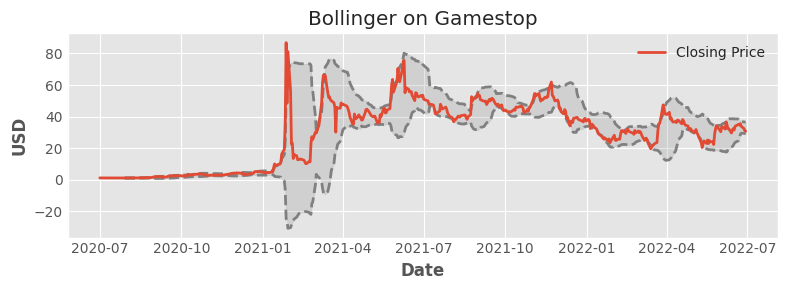

In [32]:
plt.figure(figsize = (8, 3))
plt.title("Bollinger on Gamestop")
plt.ylabel("USD")
plt.xlabel("Date")

plt.plot(df.HighBand, color="grey", linestyle ="--")
plt.plot(df.LowBand, color="grey", linestyle ="--")
plt.fill_between(df.index, df.HighBand, df.LowBand, color = "grey", alpha=0.2)
plt.plot(df.Close, label = "Closing Price")
# 注意这些数据可以直接用是因为上个代码框是已经把它们算好了
# 加color是grey是因为主要想要看的关系是一个high和low生成的带的宽度和closing price在这间的位置
# 不给high和low band加名字是想要画面更简单,linestyle is dashed line
# 最后写closing price的code是因为想要他图层在最上面
# fill_between是为了涂画high和low中间的部分，需要加个df.index来给这个code指路,alpha是改opacity

plt.legend()
plt.tight_layout()

### Exercise: High Highs

Remember price surges from our first day? Here we'll do something similar. Let's create a plot for `High` prices that helps visualise the highest highs across the entire period.

- Define a price surge threshold as two standard deviations from the mean High for the period.
- Plot both the high price over the period as well as the price surge threshold line.
- Give the plot a fitting title, labels and a legend.

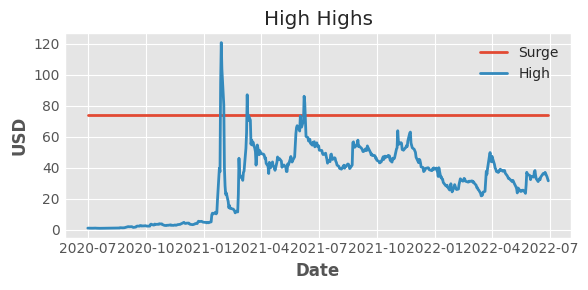

In [33]:
df["Threshold"]  = df.High.mean() + df.High.std() * 2
# 我自己做是做了个threshold的变量然后做了condition，但这样不方便画图，直接建立个新的list库可以方便画图
plt.figure(figsize=(6, 3))
plt.title("High Highs")
plt.ylabel("USD")
plt.xlabel("Date")

plt.plot(df.Threshold, label = "Surge")
plt.plot(df.High, label = "High")
plt.legend()
plt.tight_layout()

## Other common plots

Histograms show frequency distribution, or how often each value in the data occurs. They are a great way of visualising the distribution of returns in a financial data set. A histogram's tails (the sections that stretch away from the centre) offer one view of the risk of an asset. Heavy (tall) tails indicate extreme values, and long tails can indicate skew (positive skew when the tail is long to the right, and negative for long tails to the left).

For a histogram centered around zero, a negatively skewed distribution of returns can suggest that very large losses may occur. A positively skewed distribution implies the opposite - that gains can occasionally be very large. 

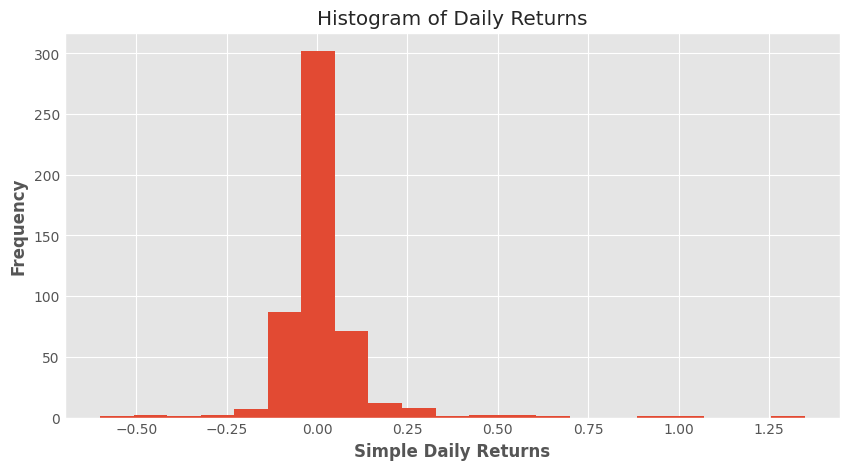

In [34]:
df["Returns"] = df["Close"].pct_change().dropna()

# Square root choice - sqrt(number_of_samples)
recommended_bins = int(np.sqrt(len(df.Returns)))

plt.figure(figsize=(10, 5))
plt.hist(df.Returns, bins=21)
# 取一个column的数据来determine frequency
plt.title("Histogram of Daily Returns")
plt.ylabel("Frequency")
plt.xlabel("Simple Daily Returns")
plt.show()
# 这个图告诉我们：数据大多都在0周围，说明都是小lose和小gain；有long right tail，说明有机会win big，但lose big的可能restricted

Scatterplots can help us visualise the relationships between two variables. They are also excellent at visualising outliers.

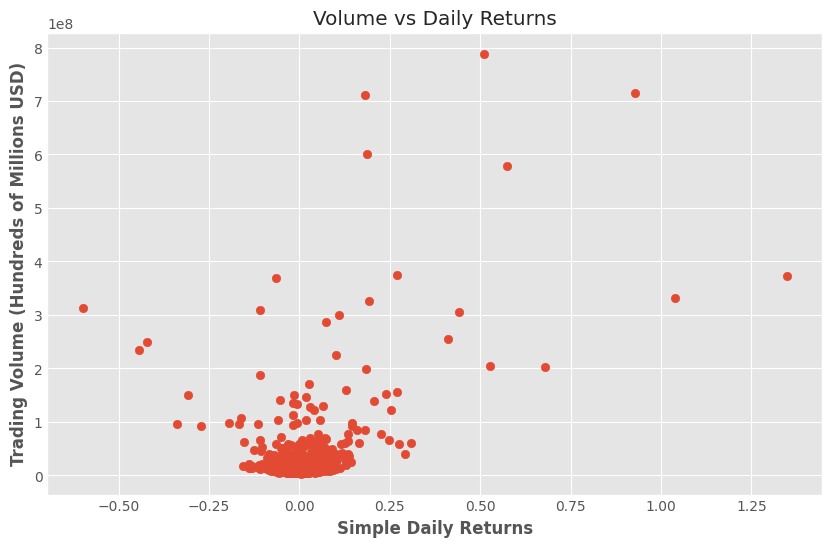

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(df.Returns, df.Volume)
# scatter图
plt.title("Volume vs Daily Returns")
plt.ylabel("Trading Volume (Hundreds of Millions USD)")
plt.xlabel("Simple Daily Returns")
plt.show()
# 这个图说明：上面的点大多在右边，说明volume上来之后positive return的机会更大

## Subplots

There are times when one plot just isn't enough. In this case we can create a subplot, and then plot on its axes. This generally calls for a different approach to Matplotlib, so watch carefully!

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

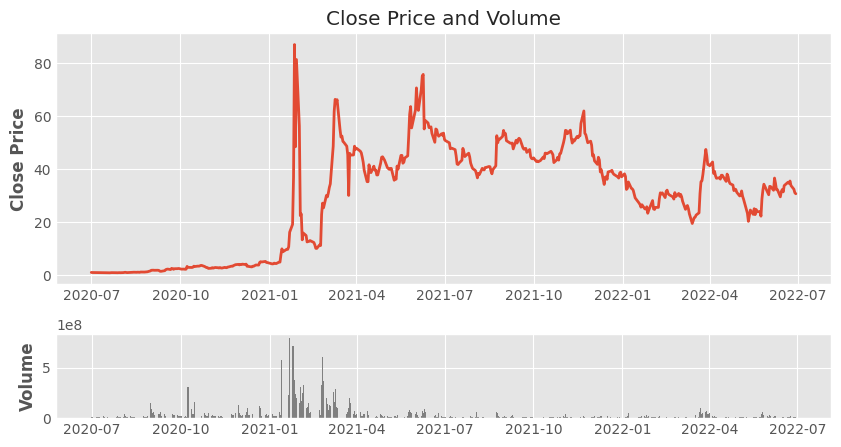

In [36]:
# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,5), gridspec_kw={"height_ratios": [3, 1]})
# nrows=2: 生成两个图，height_ratio [3,1]:上面那个图比下面那个高3倍

# Adjust the space between the two plots
fig.subplots_adjust(hspace=0.3)
# 两个图之间的space

# Plot the adjusted close prices on the first (top) subplot
ax1.plot(df.index, df['Close'], label='Close')
ax1.set_title('Close Price and Volume')
ax1.set_ylabel('Close Price')

# # Plot the volume on the second (bottom) subplot
ax2.bar(df.index, df['Volume'], label='Volume', color='grey')
ax2.set_ylabel('Volume')

# Display the plot
plt.tight_layout

# 这个图是为了展示两个variable的数据变化with respect to each other

### Matplotlib Interfaces

Prior to our subplots example, you'll notice we used `plt` to do every part of our plotting. Developers often refer to this as using the **Pyplot interface** to Matplotlib. Matplotlib also exposes a so-called **object-oriented interface**, which can be seen in the subplots example above. Using this interface involves creating the figure and axes, and then using those objects to build our plot(s).

Best practice suggests that developers should always use the object-oriented Matplotlib, even for the most basic plots.

### Advanced: Candlestick Plots

If you have OHLC data, you can use `mplfinance`. It offers yet another interface to Matplotlib (in fact, it was once part of the Matplotlib package).

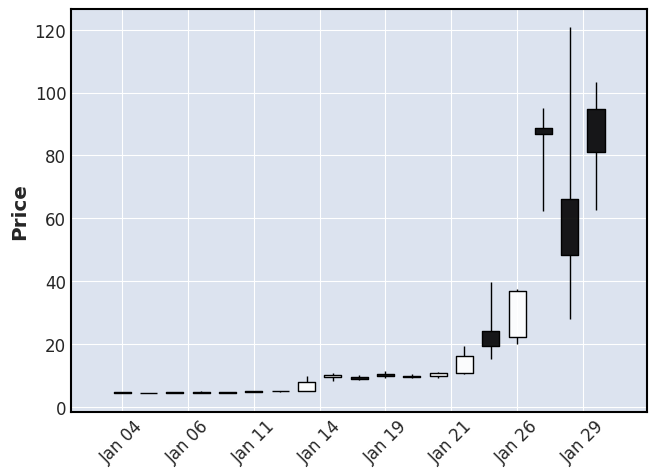

In [37]:
import mplfinance as mpf
# 有单独的package

df = df.loc["2021-01":"2021-01"]
mpf.plot(df, type='candle')
# 这个用了全部的dataframe，因为能看到high, low, close, open，全部的数据